In [5]:
"""
Purpose:
    This script is used to calculate the following x`
        1. Adjacency matrix
        2. Edge betweenness centrality
        3. Betweenness centrality
        4. Degree centrality
        5. Closeness centrality
        6. Community detection

Inputs:
    None

Outputs:
    None

Authors: Pasan Kamburugamuwa
"""
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import collections
import community as community_louvain
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.algorithms.community import girvan_newman

#Load the csv files into the df_nodes and df_edges variables
df_nodes = pd.read_csv('stack_network_nodes.csv')
df_edges = pd.read_csv('stack_network_links.csv')

In [2]:
# Display the nodes 
display(df_nodes.head(5))
print('Contains null =',df_nodes.isnull().values.any())

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


Contains null = False


In [6]:
# Display the edges
display(df_edges.head(5))
print('Contains null =',df_edges.isnull().values.any())

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


Contains null = False


In [7]:
# Calculate the number of edges and nodes in the graph
all_links = len(df_edges)
all_nodes = len(df_nodes)

print('Number of nodes :', all_nodes)
print('Number of links :', all_links)

Number of nodes : 115
Number of links : 490


In [8]:
# get edges and weight
edges = df_edges[['source', 'target']].values.tolist()
weights = [float(l) for l in df_edges.value.values.tolist()]

# Make Graph and apply weight
G = nx.Graph(directed=True)
G.add_edges_from(edges)
for cnt, a in enumerate(G.edges(data=True)):
    G.edges[(a[0], a[1])]['weight'] = weights[cnt]

### Links and nodes distribution histogram plot

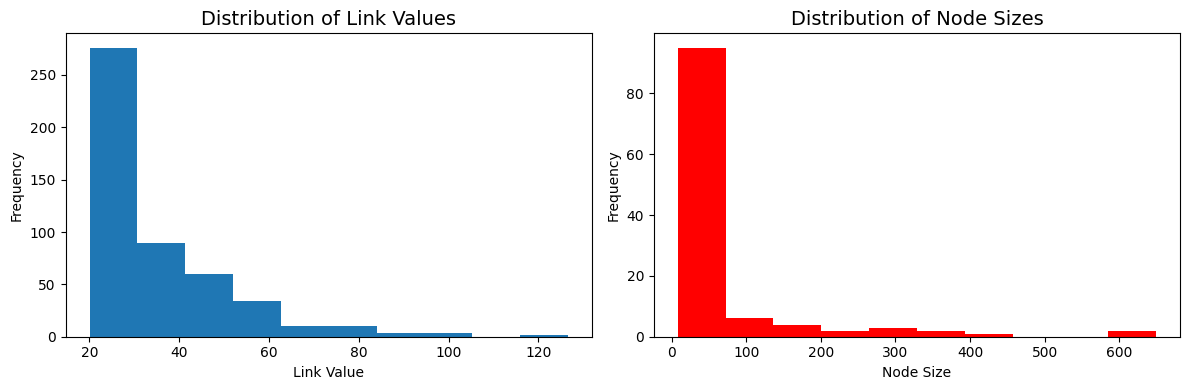

In [9]:
# Define figure size
figsize = (12, 4)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

# Font size for titles and labels
fontsize = 14

# Plot the histogram of link values
ax1.hist(df_edges.value)
ax1.set_title('Distribution of Link Values', fontsize=fontsize)
ax1.set_xlabel('Link Value')
ax1.set_ylabel('Frequency')

# Plot the histogram of node sizes
ax2.hist(df_nodes.nodesize, color='red')
ax2.set_title('Distribution of Node Sizes', fontsize=fontsize)
ax2.set_xlabel('Node Size')
ax2.set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()


# Degree Distribution 

In a graph, the degree of a node is the number of edges connected to the node. The degree distribution of a graph provides a snapshot of how the degrees (number of connections) of nodes are distributed within the graph

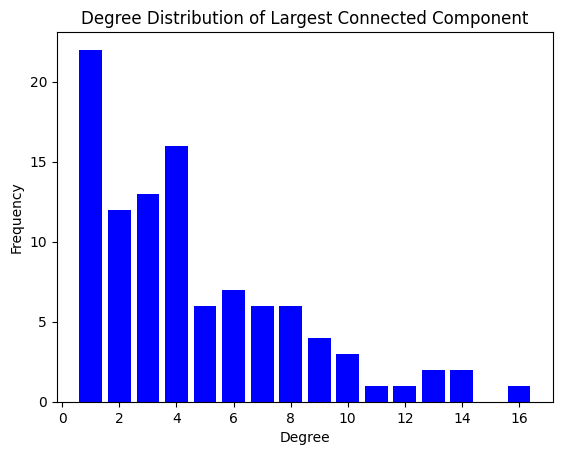

In [10]:
def plot_degree_distribution(G):
    # Find the largest connected component of the graph
    largest_component = max(nx.connected_components(G), key=len)
    G_large = G.subgraph(largest_component)
    
    # Compute the degree of each node in the largest component
    degree_sequence = [degree for _, degree in G_large.degree()]
    
    # Calculate the degree distribution using collections.Counter
    degree_count = collections.Counter(degree_sequence)
    
    # Unpack the degrees and their counts for plotting
    degrees, counts = zip(*degree_count.items())
    
    # Plotting
    plt.figure()
    plt.bar(degrees, counts, color='blue')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title('Degree Distribution of Largest Connected Component')
    plt.show()

plot_degree_distribution(G)

# Adjency Matrix

This matrix provides information about the connections (or edges) between nodes in the graph. The adjacency matrix is a square matrix, where the number of rows and columns equals the number of nodes in the graph.
Each row and each column represents a node in the graph.

In [11]:
all_node_list = []


for i in df_edges["source"].unique():
    all_node_list.append(i)


adj = nx.adjacency_matrix(G, nodelist=all_node_list)

# Convert the adjacency matrix from sparse to dense format
adj_dense = adj.todense()

# Convert the dense adjacency matrix to a Pandas DataFrame
adj_df = pd.DataFrame(adj_dense, columns=all_node_list, index=all_node_list)

# Print the DataFrame to inspect the adjacency matrix
print(adj_df)

                     azure  sql-server    asp.net  entity-framework  \
azure              0.00000    0.000000  48.407030          0.000000   
sql-server         0.00000    0.000000  26.613714         32.947446   
asp.net           48.40703   26.613714   0.000000         31.036482   
entity-framework   0.00000   32.947446  31.036482          0.000000   
wpf                0.00000    0.000000  26.032697         24.153686   
...                    ...         ...        ...               ...   
agile              0.00000    0.000000   0.000000          0.000000   
selenium           0.00000    0.000000   0.000000          0.000000   
angular            0.00000    0.000000   0.000000          0.000000   
powershell         0.00000    0.000000   0.000000          0.000000   
drupal             0.00000    0.000000   0.000000          0.000000   

                        wpf       linq        wcf         c#        tdd  \
azure              0.000000   0.000000   0.000000  32.350925   0.000000 

# Degree Centrality

 Degree centrality for a node in a graph is simply the degree (number of connections) of the node. In other words, it is the number of edges connected to the node. Degree centrality is a measure of the importance or influence of a node (or vertex) in a graph based on the number of direct connections it has.
If the node having a higher degree then it is having a great power.

In [13]:
degree_centrality = nx.degree_centrality(G)

#This will show the degree centrality of the top 10 nodes
top_10_nodes_bycentrality = sorted(degree_centrality.items(),key=lambda x:x[1],reverse=True)[0:10]
#print the top 10 nodes degree centrality
top_10_nodes_bycentrality

[('jquery', 0.14035087719298245),
 ('c#', 0.12280701754385964),
 ('css', 0.12280701754385964),
 ('asp.net', 0.11403508771929824),
 ('angularjs', 0.11403508771929824),
 ('javascript', 0.10526315789473684),
 ('mysql', 0.09649122807017543),
 ('php', 0.08771929824561403),
 ('html5', 0.08771929824561403),
 ('linux', 0.08771929824561403)]

# Betweenness Centrality

Betweenness centrality is a measure of centrality in a graph based on the idea of shortest path. Betwenness centrality of node A is fraction of shortest paths that passes through node A. Nodes with high betweeness centrality works as the 'power broker' or the 'bridges' between different isolated parts of a network.

In [14]:
betweenness_centrality = nx.betweenness_centrality(G)

In [15]:
#This will show the degree centrality of the top 10 nodes
top_10_nodes_by_betweenness_centrality = sorted(betweenness_centrality.items(),key=lambda x:x[1],reverse=True)[0:10]
#print the top 10 nodes betweenness centrality
top_10_nodes_by_betweenness_centrality

[('jquery', 0.25553997534572337),
 ('linux', 0.208401608741618),
 ('mysql', 0.19769314773273786),
 ('asp.net', 0.17406690608353656),
 ('apache', 0.1308718606343199),
 ('json', 0.12319763505138448),
 ('angularjs', 0.12286762799187793),
 ('rest', 0.11370118004957315),
 ('python', 0.1101830602249792),
 ('postgresql', 0.08761830339613293)]

# Community Detection - Louvain algorithm

The Louvain algorithm is designed to maximize modularity, a measure of the quality of a division of a network into communities.

1. Modularity Optimization
  - Initialization - Begin with each node in its own community
  - Local moving - For each node, the algorithm evaluates the change in modularity that would result from moving the node to each of its neighbor communities.
  - Move node - The node is moved to the community that results in the greated increase.
  - Repeat - The process is repeated for all nodes until no further improvements in modularity are possible.
2. Aggregation of communities
  - Merge nodes - Once the modularity optimization step stabilizes, nodes belonging to the same community are merged, creating a new, smaller network where each community is treated as single node.
  - Repeat process - re-run the modularity optimization phase on the new aggregated network.

The algorithm continues to iterate through the two phases until no further changes can be made to the community structure of the network. The final set of communities is determined when the algorithm converges, and the modularity reaches a maximum
      

In [16]:
def louvain_community_detection(G):
    """
    Performs community detection on the given graph using the Louvain algorithm.
    
    Parameters:
    - G (networkx.Graph): The input graph on which community detection is to be performed.
    
    Returns:
    - tuple: A tuple containing:
        - G (networkx.Graph): The input graph (unchanged).
        - pos (dict): A dictionary representing the layout positions of the nodes for visualization.
        - community_colors (list): A list where each element represents the community index to which a node belongs.
        - num_communities (int): The number of detected communities.
        - community_nodes (list): A list of lists, where each inner list contains the nodes belonging to a particular community.
    """
    # Perform community detection using the Louvain algorithm
    partition = community_louvain.best_partition(G)
    
    # Compute the layout for visualization
    pos = graphviz_layout(G)
    
    # Initialize lists to hold community data
    community_nodes = []
    community_colors = [0] * len(G.nodes())
    
    # Map nodes to communities and build community nodes list
    community_mapping = {}
    for community_index, nodes in partition.items():
        community_nodes.append([node for node, comm in partition.items() if comm == community_index])
    
    # Calculate the number of detected communities
    num_communities = len(community_nodes)
    
    # Map nodes to their community index for coloring
    node_to_community_map = {node: community_index for community_index, nodes in enumerate(community_nodes) for node in nodes}
    
    # Set community index as color for each node
    for node, community_index in node_to_community_map.items():
        community_colors[list(G.nodes).index(node)] = community_index
    
    return G, pos, community_colors, num_communities, community_nodes

In [17]:
G, pos, community_colors, num_communities, community_nodes = louvain_community_detection(G)

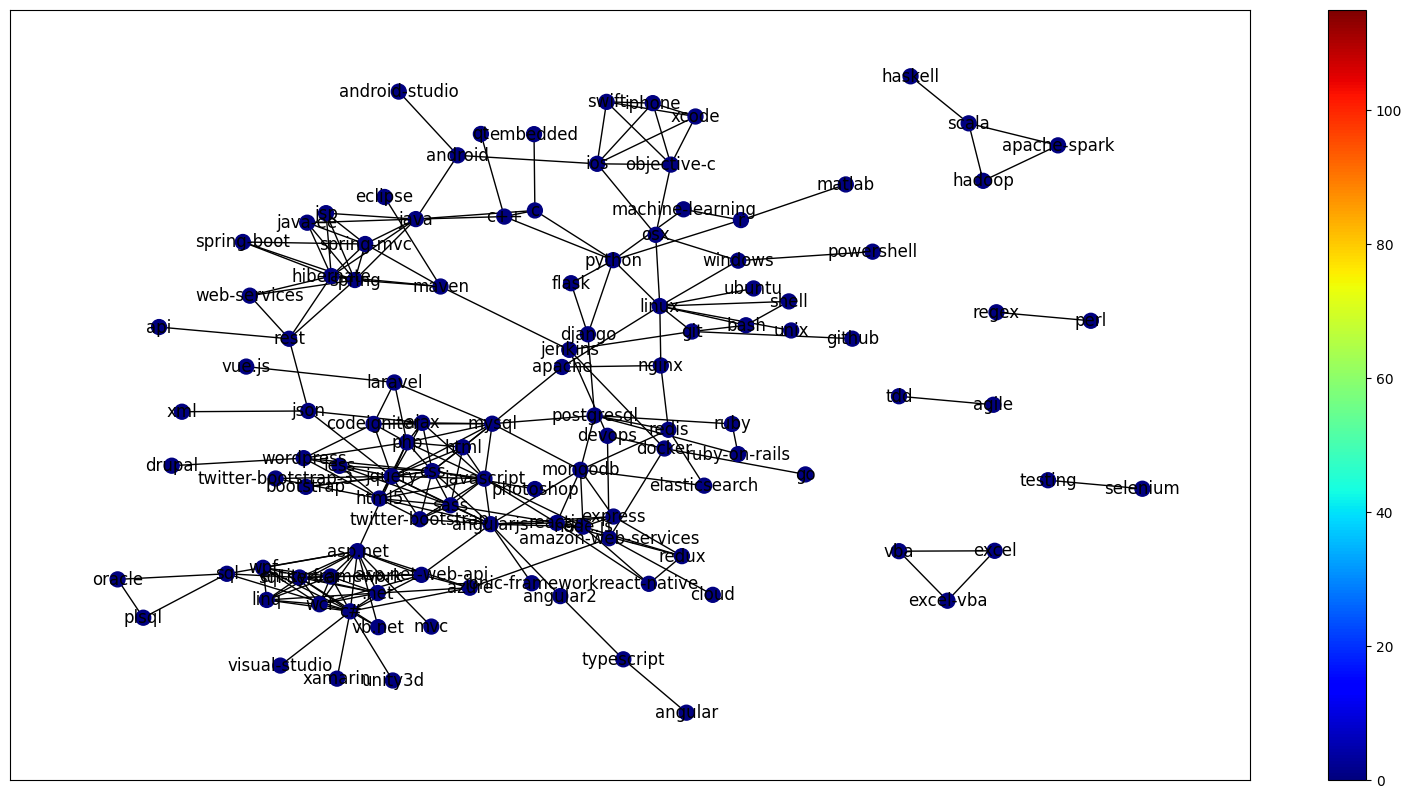

In [18]:
edges = G.edges()
Feature_color_sub = community_colors
node_size = all_nodes

fig = plt.figure(figsize=(20, 10))
im = nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=Feature_color_sub, cmap='jet', vmin=0, vmax=num_communities)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=12, font_color="black")
plt.xticks([])
plt.yticks([])
plt.colorbar(im)
plt.show(block=False)

# Community Detection - Girvan algorithm

The Girvan-Newman algorithm is an edge-centric algorithm that identifies communities in a graph by recursively removing edges with the highest betweenness centrality. This process continues until the graph is split into disconnected components, which represent different communities.

In [19]:
def edge_to_remove(G):
  G_dict = nx.edge_betweenness_centrality(G)
  edge = ()

  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge


def girvan_newman(G):
    sg = nx.connected_components(G)
    sg_count = nx.number_connected_components(G)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(G)[0], edge_to_remove(G)[1])
        sg = nx.connected_components(G)
        sg_count = nx.number_connected_components(G)

    return sg

c = girvan_newman(G.copy())

node_groups = []

for i in c:
  node_groups.append(list(i))

node_groups

[['unity3d',
  'express',
  'linq',
  'html5',
  'hibernate',
  'react-native',
  'c++',
  'elasticsearch',
  'windows',
  'angular',
  'docker',
  'laravel',
  'typescript',
  'c#',
  'android-studio',
  'amazon-web-services',
  'twitter-bootstrap',
  'sql-server',
  'flask',
  'vue.js',
  'sql',
  'api',
  'embedded',
  'mongodb',
  'ios',
  'mvc',
  'rest',
  'spring',
  'github',
  'drupal',
  'less',
  'oracle',
  'python',
  'photoshop',
  'redis',
  'plsql',
  'java',
  'spring-mvc',
  'ubuntu',
  'eclipse',
  'c',
  'osx',
  'ajax',
  'cloud',
  'json',
  'xcode',
  'jsp',
  'html',
  'machine-learning',
  'maven',
  'asp.net',
  'powershell',
  'xml',
  'bash',
  'ruby-on-rails',
  'node.js',
  'jquery',
  'iphone',
  'asp.net-web-api',
  'matlab',
  'spring-boot',
  'nginx',
  'shell',
  'postgresql',
  'objective-c',
  'angularjs',
  'php',
  'r',
  'swift',
  'wcf',
  'entity-framework',
  'azure',
  'jenkins',
  'twitter-bootstrap-3',
  'apache',
  'go',
  'unix',
  '.net'

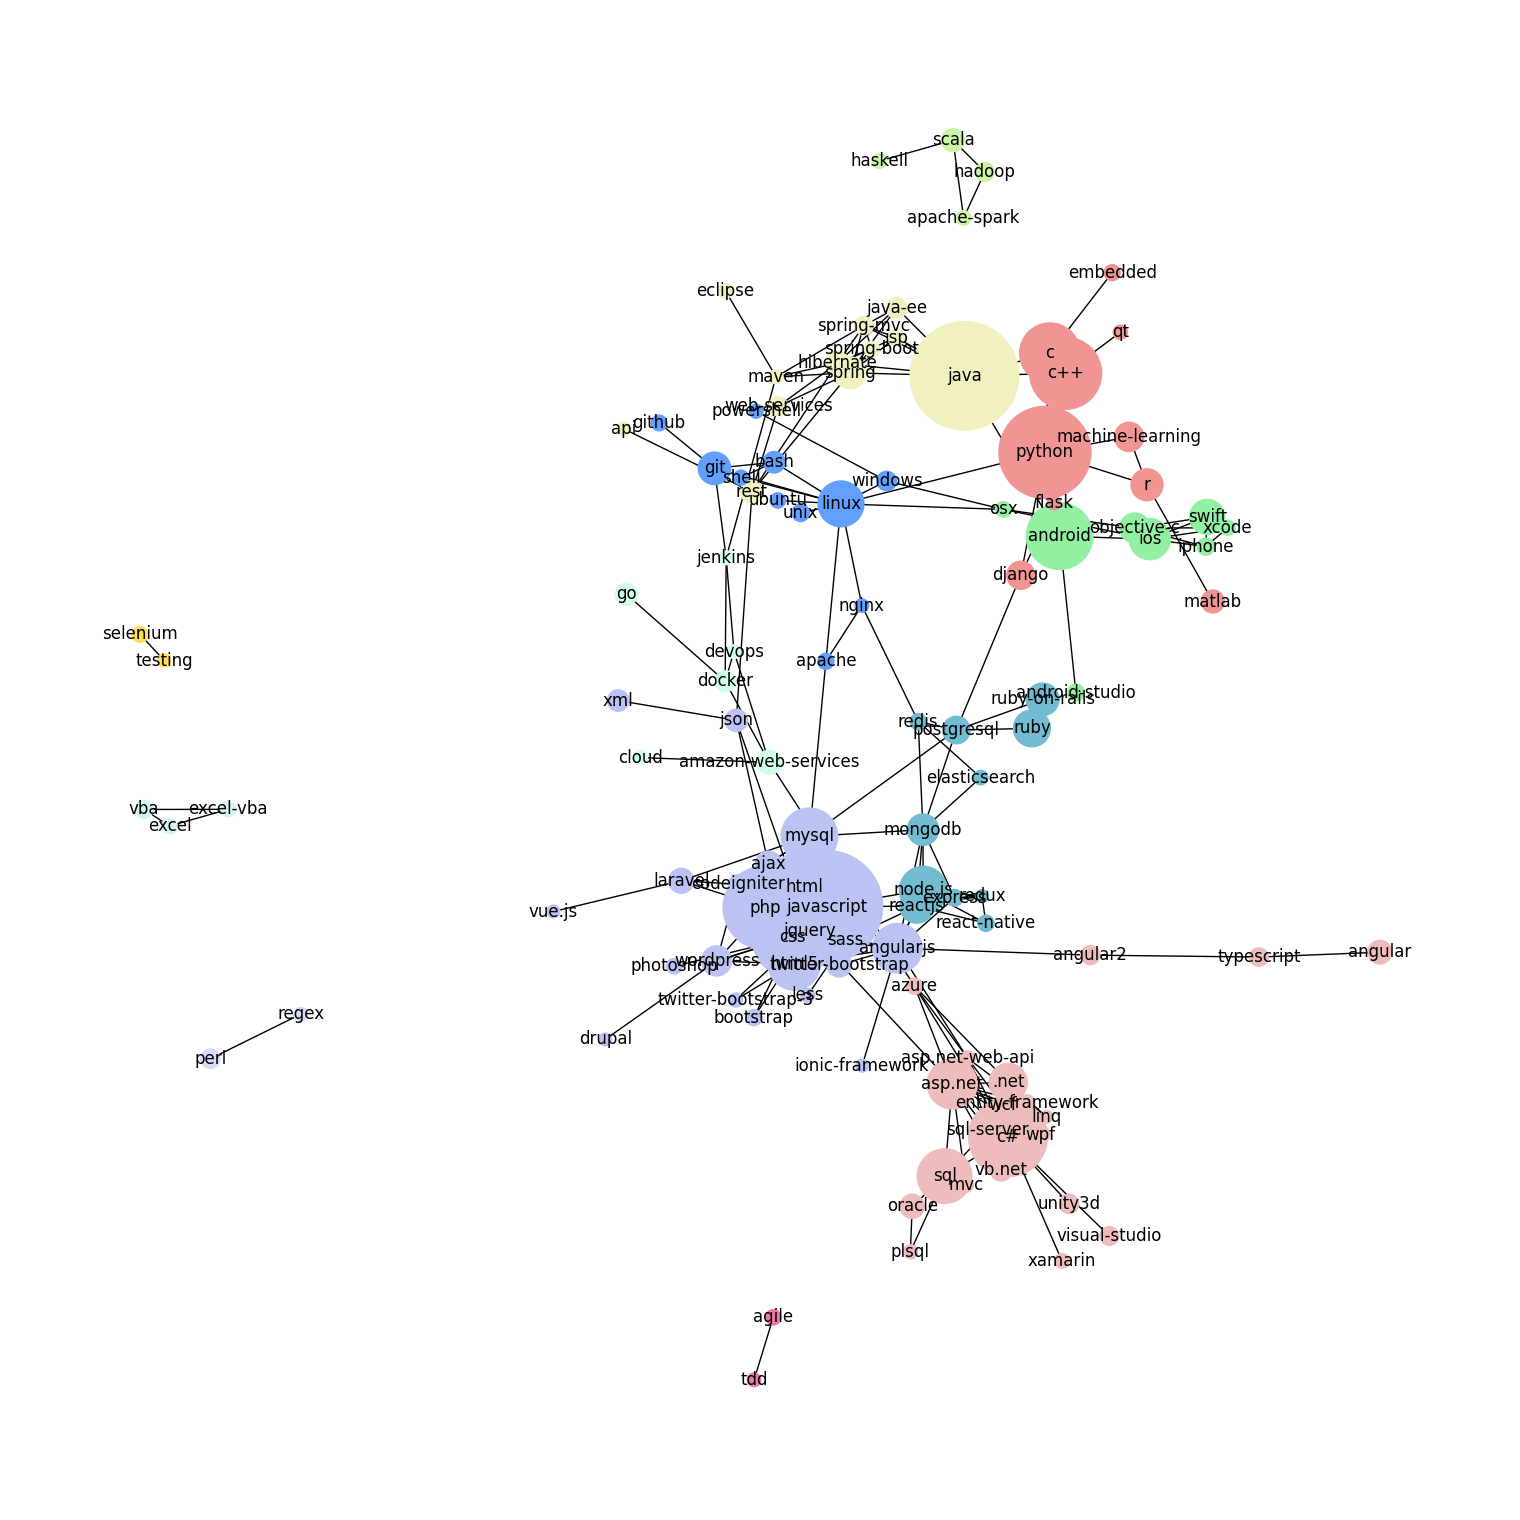

In [26]:
# plot the communities
plt.figure(figsize=(15,15))
options = {
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}
colors = [color_map[G.nodes[node]['group']] for node in G]
sizes = [G.nodes[node]['nodesize']*10 for node in G]

nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.5, iterations=50), **options)
#ax = plt.gca()
#ax.collections[0].set_edgecolor("#555555") 
plt.show()